Dado que el entrenamiento de redes neuronales es una tarea  muy costosa, **se recomienda ejecutar el notebooks en [Google Colab](https://colab.research.google.com)**, por supuesto también se puede ejecutar en local.

Al entrar en [Google Colab](https://colab.research.google.com) bastará con hacer click en `upload` y subir este notebook. No olvide luego descargarlo en `File->Download .ipynb`

**El examen deberá ser entregado con las celdas ejecutadas, si alguna celda no está ejecutadas no se contará.**

El examen se divide en dos partes, con la puntuación que se indica a continuación. La puntuación máxima será 10.

- [Actividad 1: Redes Densas](#actividad_1): 5 pts
    - Correcta normalización: máximo de 0.25 pts
    - [Cuestión 1](#1.1): 1.5 pt
    - [Cuestión 2](#1.2): 1.5 pt
    - [Cuestión 3](#1.3): 0.5 pts
    - [Cuestión 4](#1.4): 0.25 pts
    - [Cuestión 5](#1.5): 0.25 pts
    - [Cuestión 6](#1.6): 0.25 pts
    - [Cuestión 7](#1.7): 0.25 pts
    - [Cuestión 8](#1.8): 0.25 pts


- [Actividad 2: Redes Convolucionales](#actividad_2): 5 pts
    - [Cuestión 1](#2.1): 2.5 pt
    - [Cuestión 2](#2.2): 1 pt
    - [Cuestión 3](#2.3): 0.5 pts
    - [Cuestión 4](#2.4): 0.5 pts
    - [Cuestión 5](#2.5): 0.5 pts
    

In [1]:
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import random
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)
keras.utils.set_random_seed(0)

<a name='actividad_1'></a>
# Actividad 1: Redes Densas

Para esta primera actividad vamos a utilizar el [California Housing Dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset). Con el que trataremos de predecir el precio mediano de las viviendas en diferentes distritos de California.

El precio de las viviendas es un valor continuo que está expresado en cientos de miles de dólares (por ejemplo, un valor de 2.5 significa $250,000). Por lo tanto, el problema es una `regresión`.

**Features del dataset:**
- MedInc: Ingreso mediano del distrito
- HouseAge: Edad mediana de las casas
- AveRooms: Promedio de habitaciones por vivienda
- AveBedrms: Promedio de dormitorios por vivienda
- Population: Población del distrito
- AveOccup: Promedio de ocupantes por vivienda
- Latitude: Latitud
- Longitude: Longitud


**Puntuación**:

Normalizar las features correctamente (x_train, x_test): 0.25 pts , se pueden normalizar con el [Normalization layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/Normalization) de Keras.


- Correcta normalización: máximo de 0.25 pts
- [Cuestión 1](#1.1): 1.5 pt
- [Cuestión 2](#1.2): 1.5 pt
- [Cuestión 3](#1.3): 0.5 pts
- [Cuestión 4](#1.4): 0.25 pts
- [Cuestión 5](#1.5): 0.25 pts
- [Cuestión 6](#1.6): 0.25 pts
- [Cuestión 7](#1.7): 0.25 pts
- [Cuestión 8](#1.8): 0.25 pts

In [2]:
# Cargar el dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Mostrar información básica
print(f"Tamaño del dataset: {df.shape}")
print(f"Rango de precios: ${df['MedHouseVal'].min():.1f}k - ${df['MedHouseVal'].max():.1f}k")
print("\nPrimeras 5 filas:")
df.head()

Tamaño del dataset: (20640, 9)
Rango de precios: $0.1k - $5.0k

Primeras 5 filas:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# separar features y target
y = df.pop('MedHouseVal').values
X = df.copy().values

In [4]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print('x_train, y_train shapes:', X_train.shape, y_train.shape)
print('x_test, y_test shapes:', X_test.shape, y_test.shape)
print('Some prices: ', y_train[:5])

x_train, y_train shapes: (15480, 8) (15480,)
x_test, y_test shapes: (5160, 8) (5160,)
Some prices:  [3.813   3.293   1.854   5.00001 0.975  ]


In [5]:
## Si quiere, puede normalizar las features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

<a name='1.1'></a>
## Cuestión 1: Cree un modelo secuencial que contenga 4 capas ocultas(hidden layers), con más de 60 neuronas  por capa, sin regularización y obtenga los resultados.

In [6]:
# Codifique el modelo en esta celda
model = tf.keras.models.Sequential()
model.add(layers.Input(shape=(8,), name='input_layer'))
model.add(layers.Dense(64, activation='relu', name='hidden_1'))
model.add(layers.Dense(64, activation='relu', name='hidden_2'))
model.add(layers.Dense(64, activation='relu', name='hidden_3'))
model.add(layers.Dense(64, activation='relu', name='hidden_4'))
model.add(layers.Dense(1, activation='linear', name='output'))



In [7]:
# Compilación del modelo
# Código aquí
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [8]:
history = model.fit(X_train_norm,
          y_train,
          epochs=60,
          batch_size=32,
          validation_split=0.2,
          verbose=1)

Epoch 1/60
387/387 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.3557 - mae: 0.7820 - val_loss: 0.3845 - val_mae: 0.4659
Epoch 2/60
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4039 - mae: 0.4399 - val_loss: 0.3556 - val_mae: 0.4469
Epoch 3/60
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3686 - mae: 0.4213 - val_loss: 0.3469 - val_mae: 0.4429
Epoch 4/60
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3515 - mae: 0.4075 - val_loss: 0.3330 - val_mae: 0.4290
Epoch 5/60
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3365 - mae: 0.3984 - val_loss: 0.3248 - val_mae: 0.4218
Epoch 6/60
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3281 - mae: 0.3919 - val_loss: 0.3256 - val_mae: 0.4226
Epoch 7/60
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3223 - mae: 0.3875 - val_loss: 0.3181 - val_mae: 0.4159
Epoch 8/60
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3162 - mae: 0.3832 - val_loss: 0.3118 - val_mae: 0.4066
Epoch 9/60
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

In [9]:
# No modifique el código
results = model.evaluate(X_test_norm, y_test, verbose=1)
test_metrics = dict(zip(model.metrics_names, results))
print('Test Metrics:', test_metrics)

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3172 - mae: 0.3621
Test Metrics: {'loss': 0.30225852131843567, 'compile_metrics': 0.3548179566860199}


In [10]:
def show_loss_evolution(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(12,6))

  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.plot(hist['epoch'],hist['loss'],label='Train Error')
  plt.plot(hist['epoch'],hist['val_loss'],label='Val Error')
  plt.grid()
  plt.legend()
  plt.show()

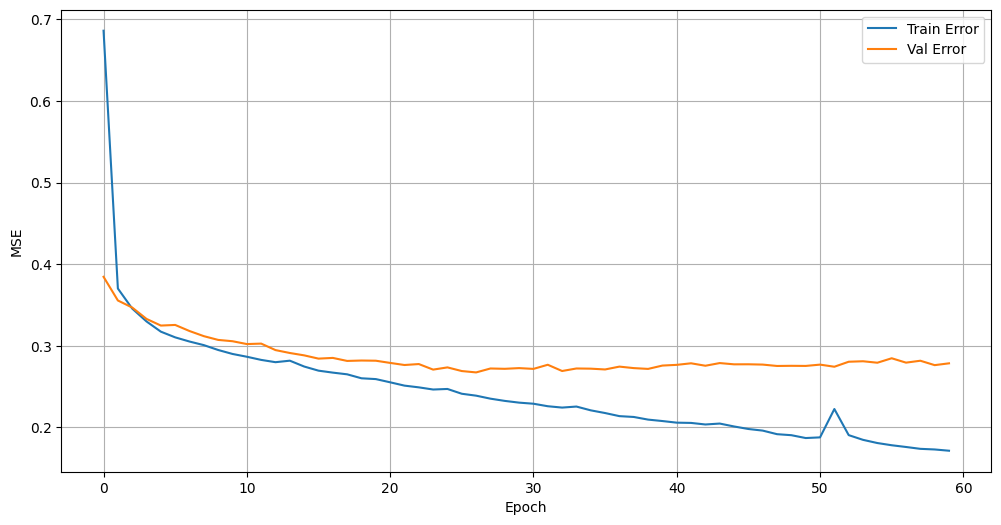

In [11]:
show_loss_evolution(history)

<a name='1.2'></a>
## Cuestión 2: Utilice el mismo modelo de la cuestión anterior pero añadiendo al menos dos técnicas distinas de regularización. No es necesario reducir el `test loss`.

Ejemplos de regularización: [Prevent_Overfitting.ipynb](https://github.com/ezponda/intro_deep_learning/blob/main/class/Fundamentals/Prevent_Overfitting.ipynb)

In [12]:
model = tf.keras.models.Sequential()
model.add(layers.Input(shape=(8,), name='input_layer'))
model.add(layers.Dense(64, activation='relu', name='hidden_1'))
model.add(layers.Dense(64, activation='relu', name='hidden_2'))
model.add(layers.Dropout(0.3)) # Primera técncia, Dropout
model.add(layers.BatchNormalization()) # Segunda técnica, Batch normalization
model.add(layers.Dense(64, activation='relu', name='hidden_3'))
model.add(layers.Dense(64, activation='relu', name='hidden_4'))
model.add(layers.Dense(1, activation='linear', name='output'))

In [13]:
# Compilación del modelo
# Código aquí
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [14]:
# Tercer téncica, reducción del batch_size
batch_size=16

In [15]:
history = model.fit(X_train_norm,
          y_train,
          epochs=60,
          batch_size=batch_size,
          validation_split=0.2,
          verbose=1)

Epoch 1/60
774/774 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.8674 - mae: 0.6865 - val_loss: 0.5404 - val_mae: 0.5023
Epoch 2/60
774/774 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5226 - mae: 0.5292 - val_loss: 0.5278 - val_mae: 0.5010
Epoch 3/60
774/774 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4682 - mae: 0.4963 - val_loss: 0.5152 - val_mae: 0.4734
Epoch 4/60
774/774 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4488 - mae: 0.4836 - val_loss: 0.5133 - val_mae: 0.4978
Epoch 5/60
774/774 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4408 - mae: 0.4744 - val_loss: 0.4632 - val_mae: 0.4623
Epoch 6/60
774/774 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4222 - mae: 0.4677 - val_loss: 0.4341 - val_mae: 0.4531
Epoch 7/60
774/774 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.4076 - mae: 0.4540 - val_loss: 0.4015 - val_mae: 0.4336
Epoch 8/60
774/774 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3968 - mae: 0.4468 - val_loss: 0.4854 - val_mae: 0.4550
Epoch 9/60
774/774 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - lo

In [16]:
# No modifique el código
results = model.evaluate(X_test_norm, y_test, verbose=1)
test_metrics = dict(zip(model.metrics_names, results))
print('Test Metrics:', test_metrics)

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7258 - mae: 0.3900
Test Metrics: {'loss': 0.6431170105934143, 'compile_metrics': 0.3885132670402527}


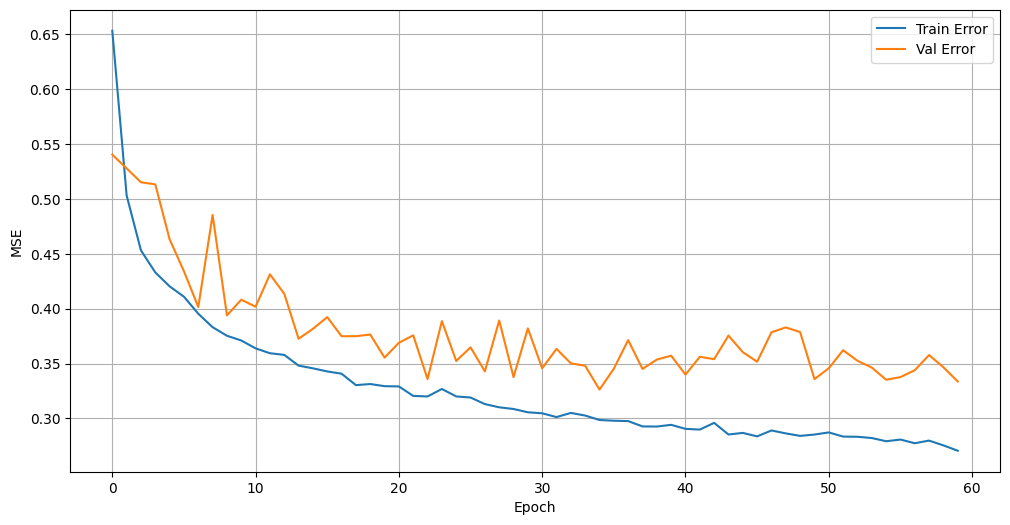

In [17]:
show_loss_evolution(history)

<a name='1.3'></a>
## Cuestión 3: Utilice el mismo modelo de la cuestión anterior pero añadiendo un callback de early stopping.  No es necesario reducir el `test loss`.

In [18]:
model = tf.keras.models.Sequential()
model.add(layers.Input(shape=(8,), name='input_layer'))
model.add(layers.Dense(64, activation='relu', name='hidden_1'))
model.add(layers.Dense(64, activation='relu', name='hidden_2'))
model.add(layers.Dropout(0.3)) # Primera técncia, Dropout
model.add(layers.BatchNormalization()) # Segunda tecnica, Batch normalization
model.add(layers.Dense(64, activation='relu', name='hidden_3'))
model.add(layers.Dense(64, activation='relu', name='hidden_4'))
model.add(layers.Dense(1, activation='linear', name='output'))

In [19]:
# Compilación del modelo
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [20]:
batch_size=16

In [21]:
## definir el early stopping callback
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',         # métrica a observar
    patience=5,                 # nº de épocas sin mejora antes de detener
    restore_best_weights=True,  # vuelve a los mejores pesos
    verbose=1
)

history = model.fit(X_train_norm,
          y_train,
          epochs=60,
          batch_size=batch_size,
          validation_split=0.2,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/60
774/774 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.4749 - mae: 0.8348 - val_loss: 0.6630 - val_mae: 0.5806
Epoch 2/60
774/774 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5315 - mae: 0.5320 - val_loss: 0.4336 - val_mae: 0.4515
Epoch 3/60
774/774 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4660 - mae: 0.4941 - val_loss: 0.4450 - val_mae: 0.4574
Epoch 4/60
774/774 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4336 - mae: 0.4728 - val_loss: 0.3869 - val_mae: 0.4167
Epoch 5/60
774/774 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4211 - mae: 0.4643 - val_loss: 0.4100 - val_mae: 0.4281
Epoch 6/60
774/774 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4117 - mae: 0.4607 - val_loss: 0.3729 - val_mae: 0.4112
Epoch 7/60
774/774 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3974 - mae: 0.4511 - val_loss: 0.3777 - val_mae: 0.4077
Epoch 8/60
774/774 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3869 - mae: 0.4434 - val_loss: 0.3977 - val_mae: 0.4196
Epoch 9/60
774/774 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - lo

In [22]:
# No modifique el código
results = model.evaluate(X_test_norm, y_test, verbose=1)
test_metrics = dict(zip(model.metrics_names, results))
print('Test Metrics:', test_metrics)

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5013 - mae: 0.3997
Test Metrics: {'loss': 0.4848548471927643, 'compile_metrics': 0.40353265404701233}


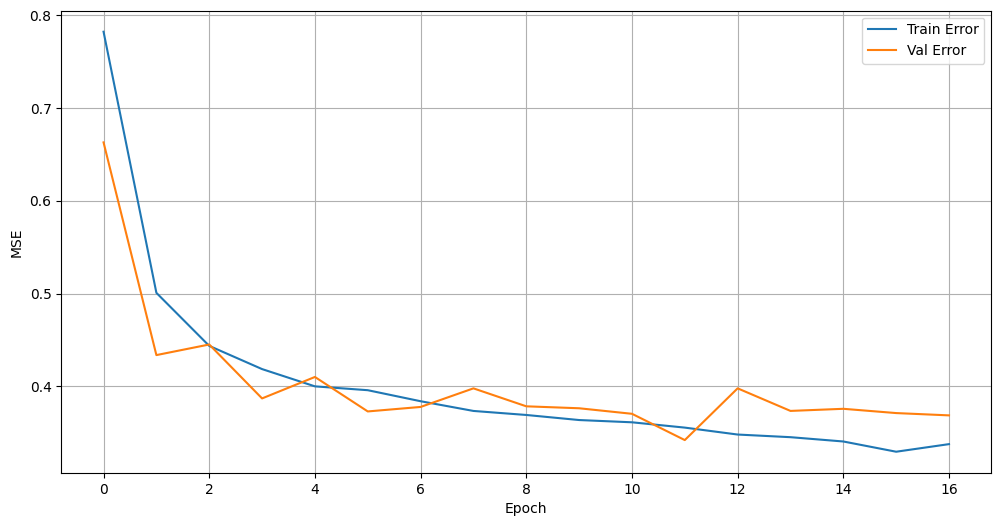

In [23]:
show_loss_evolution(history)

<a name='1.4'></a>
## Cuestión 4: ¿Podría haberse usado otra función de activación de la neurona de salida? En caso afirmativo especifíquela.

Si, en caso de que escalasemos también la variable objetivo *y*, podriamos utilizar la función de activación de la neurona de salida `tanh`. Por otro lado, puesto que nuestros valores son mayores que 0 y sin limitación de positivo, podríamos utilizar la función `relu` en una neurona de salida, aun que es mas recomebdale utilizar la función `linear`.

<a name='1.5'></a>
## Cuestión 5:  ¿Qué es lo que una neurona calcula?

**a)** Una función de activación seguida de una suma ponderada  de las entradas.

**b)** Una suma ponderada  de las entradas seguida de una función de activación.

**c)** Una función de pérdida, definida sobre el target.

**d)** Ninguna  de las anteriores es correcta


**Respuesta:** b)

**Justificación o aclaración (opcional):**  Una suma ponderada de las entradas (parte lineal) seguida de una función de activación (parte no lineal).

<a name='1.6'></a>
## Cuestión 6:  ¿Cuál de estas funciones de activación no debería usarse en una capa oculta (hidden layer)?

**a)** `sigmoid`

**b)** `tanh`

**c)** `relu`

**d)** `linear`




**Respuesta:** d)

**Justificación o aclaración (opcional):** Las capas ocultas en una red neuronal deben inroducir no linealidad en el modelo para que pueda aprender relaciones complejas entre las variables.

<a name='1.7'></a>
## Cuestión 7:  ¿Cuál de estas técnicas es efectiva para combatir el overfitting en una red con varias capas ocultas? Ponga todas las que lo sean.

**a)** Dropout

**b)** Regularización L2.

**c)** Aumentar el tamaño del test set.

**d)** Aumentar el tamaño del validation set.

**e)** Reducir el número de capas de la red.

**f)** Data augmentation.


**Respuesta:** a, b, e, f

**Justificación o aclaración (opcional):**

<a name='1.8'></a>
## Cuestión 8:  Supongamos que queremos entrenar una red para un problema de clasificación de imágenes con las siguientes clases: {'perro','gato','persona'}. ¿Cuántas neuronas y que función de activación debería tener la capa de salida? ¿Qué función de pérdida (loss function) debería usarse?


**Respuesta:**
- Número de neuronas: 3
- Función de activación: `softmax`
- Loss function: `categorical_crossentropy` (si las etiquetas están codificadas en one-hot) o `sparse_categorical_crossentropy` (si las etiquetas son enteras)

**Justificación o aclaración (opcional):** El numero de neuronas depende de las posibles respuestas del modelo, puesto que tenemos tres categorias, deberá ser tres. La función de activación es la `softmax`, la dirigida a los problemas de clasificación multiclase, y la loss function es ka `categorical_crossentropy` (si las etiquetas están codificadas en one-hot) o `sparse_categorical_crossentropy` (si las etiquetas son enteras)



<a name='actividad_2'></a>
# Actividad 2: Redes Convolucionales

Vamos a usar el dataset [cifar-10](https://www.cs.toronto.edu/~kriz/cifar.html), que son 60000 imágenes de 32x32 a color  con 10 clases diferentes. Para realizar mejor la práctica puede consultar [Introduction_to_CNN.ipynb](https://github.com/ezponda/intro_deep_learning/blob/main/class/CNN/Introduction_to_CNN.ipynb).



**Puntuación**:

- [Cuestión 1](#2.1): 2.5 pt
- [Cuestión 2](#2.2): 1 pt
- [Cuestión 3](#2.3): 0.5 pts
- [Cuestión 4](#2.4): 0.5 pts
- [Cuestión 5](#2.5): 0.5 pts

Puede normalizar las imágenes al principio o usar la capa [Rescaling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/Rescaling):

```python
tf.keras.layers.experimental.preprocessing.Rescaling(
    scale, offset=0.0, name=None, **kwargs
)
```

In [24]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [25]:
# Normalización de los Datos
X_train_norm = X_train.astype('float32') / 255.0
X_test_norm = X_test.astype('float32') / 255.0

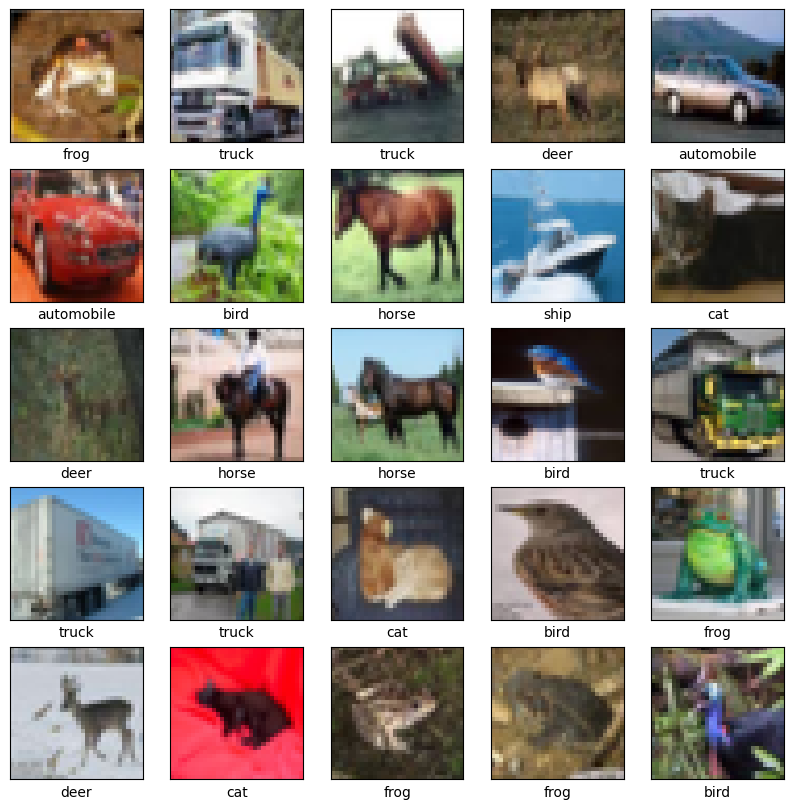

In [26]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [27]:

print('X_train, y_train shapes:', X_train.shape, y_train.shape)
print('X_test, y_test shapes:', X_test.shape, y_test.shape)
print('X_train, y_train shapes:', X_train_norm.shape, y_train.shape)
print('X_test, y_test shapes:', X_test_norm.shape, y_test.shape)

X_train, y_train shapes: (50000, 32, 32, 3) (50000,)
X_test, y_test shapes: (10000, 32, 32, 3) (10000,)
X_train, y_train shapes: (50000, 32, 32, 3) (50000,)
X_test, y_test shapes: (10000, 32, 32, 3) (10000,)


<a name='2.1'></a>
## Cuestión 1: Cree una red convolucional con la API funcional con al menos dos capas convolucionales y al menos dos capas de pooling. Debe obtener un `Test accuracy > 0.70`

In [28]:
inputs = tf.keras.Input(shape=(32, 32, 3), name='input')

# Convolution + pooling layers
# Bloque 1
x = layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',
                  padding='same', name='conv_1')(inputs)
x= layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2,2), name='pool_1')(x)
x = layers.Dropout(0.25)(x)

# Bloque 2
x = layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',
                  padding='same', name='conv_2')(x)
x= layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2,2), name='pool_2')(x)
x = layers.Dropout(0.25)(x)

# Flattening
x = layers.Flatten(name='flatten')(x)

# Fully-connected
x = layers.Dense(units=64, activation='relu', name='dense_1')(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(10, activation='softmax', name='output')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [29]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [30]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)


In [31]:
history = model.fit(X_train_norm,
                    y_train,
                    epochs=25,
                    batch_size=128,
                    validation_split=0.15,
                    callbacks = [early_stop])

Epoch 1/25
665/665 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.2354 - loss: 2.1241 - val_accuracy: 0.4496 - val_loss: 1.5124
Epoch 2/25
665/665 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3810 - loss: 1.6641 - val_accuracy: 0.5263 - val_loss: 1.3298
Epoch 3/25
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4553 - loss: 1.5023 - val_accuracy: 0.5567 - val_loss: 1.2562
Epoch 4/25
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5097 - loss: 1.3777 - val_accuracy: 0.5933 - val_loss: 1.1656
Epoch 5/25
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5449 - loss: 1.2815 - val_accuracy: 0.6331 - val_loss: 1.0418
Epoch 6/25
665/665 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5733 - loss: 1.2151 - val_accuracy: 0.6379 - val_loss: 1.0294
Epoch 7/25
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5887 - loss: 1.1629 - val_accuracy: 0.6415 - val_loss: 1.0250
Epoch 8/25
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6083 - loss: 1.1047 - val_accuracy: 

In [32]:
# No modifique el código
results = model.evaluate(X_test_norm, y_test, verbose=1)

test_metrics = dict(zip(model.metrics_names, results))
for metric in model.metrics_names:
    print(f"test_{metric}: {test_metrics[metric]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7064 - loss: 0.8628
test_loss: 0.8673583269119263
test_compile_metrics: 0.7078999876976013


<a name='2.2'></a>
## Cuestión 2: Cree el mismo  modelo de manera secuencial. No es necesario compilar ni entrenar el modelo

In [33]:
model_seq = tf.keras.models.Sequential([
        layers.Input(shape=(32,32,3),name='input'),
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', name='conv_1'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2,2), name='pool_1'),
        layers.Dropout(0.25),
        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', name='conv_2'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2,2), name='pool_2'),
        layers.Dropout(0.25),
        layers.Flatten(name='flatten'),
        layers.Dense(units=64, activation='relu', name='dense_1'),
        layers.Dropout(0.4),
        layers.Dense(10, activation='softmax', name='output')

])

model.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_1 (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1 (MaxPooling2D)           │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2 (MaxPooling2D)           │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 847,520 (3.23 MB)

 Trainable params: 282,442 (1.08 MB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 564,886 (2.15 MB)

<a name='2.3'></a>
## Cuestión 3: Si tenenemos una  una imagen de entrada de 300 x 300 a color (RGB) y queremos usar una red densa. Si la primera capa oculta tiene 100 neuronas, ¿Cuántos parámetros tendrá esa capa (sin incluir el bias) ?


**Respuesta:** 27 000 000 de parámetros

<a name='2.4'></a>
## Cuestión 4   Ponga  las verdaderas ventajas de las redes convolucionales respecto a las densas

**a)** Reducen el número total de parámetros, reduciendo así el overfitting.

**b)** Permiten utilizar una misma 'función'  en varias localizaciones de la imagen de entrada, en lugar de aprender una función diferente para cada pixel.

**c)** Permiten el uso del transfer learning.

**d)** Generalmente son menos profundas, lo que facilita su entrenamiento.



**Respuesta:** a, b, c

<a name='2.5'></a>
## Cuestión 5: Para el procesamiento de series temporales las redes convolucionales no son efectivas, habrá que usar redes recurrentes.

- **Verdadero**
- **Falso**

**Respuesta:** Falso

**Justificación o aclaración (opcional):**